<a href="https://colab.research.google.com/github/yvnnng/COGS108_Repo/blob/main/Copy_of_LEGO_Project_Analysis_5_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from urllib.request import Request, urlopen

# Import seaborn and apply its plotting styles
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

#improve resolution
%config InlineBackend.figure_format ='retina'


In [ ]:
brickset = pd.read_csv('https://raw.githubusercontent.com/nk0305/COGS108_Repo/main/brickset.csv')
brickset.head()

,set_number,name,theme,subtheme,year,pieces,no_of_minifigs,minifig_list,rrp,ppp,...,value_new,value_used,notes,no_owned,no_want,rating,num_ratings,num_reviews,tags,designer
0,8630-1,Gold Hunt,Agents,NaN,2008,352.0,3.0,"['agt007', 'agt008', 'agt009']",NaN,8.5c,...,~$87.35,~$22.75,NaN,3182.0,1188,4.0,95.0,11.0,"['Agent Fuse', 'Gold Tooth', 'Henchman', '4X4'...",['Mark Stafford']
1,8631-1,Jetpack Pursuit,Agents,NaN,2008,88.0,2.0,"['agt004', 'agt005']",NaN,11.4c,...,~$36.18,~$10.11,NaN,4534.0,960,3.9,124.0,27.0,"['Agent Chase', 'Saw Fist', 'Aircraft', 'Dr In...",NaN
2,8632-1,Swamp Raid,Agents,NaN,2008,231.0,2.0,"['agt003', 'agt006']",NaN,8.7c,...,~$51.25,~$17.15,NaN,3564.0,1085,3.9,106.0,18.0,"['Agent Charge', 'Break Jaw', 'Boat', 'Crimina...",['Mark Stafford']
3,8633-1,Speedboat Rescue,Agents,NaN,2008,340.0,3.0,"['agt001a', 'agt002', 'agt003']",NaN,11.8c,...,~$90.56,~$35.70,NaN,2490.0,1239,3.9,75.0,9.0,"['Agent Chase', 'Agent Trace', 'Break Jaw', 'B...",['Raphael Pretesacque']
4,8634-1,Turbocar Chase,Agents,NaN,2008,498.0,3.0,"['agt001', 'agt008', 'agt015']",NaN,10.0c,...,~$220.00,~$52.70,NaN,2439.0,1433,4.3,76.0,9.0,"['Agent Chase', 'Henchman', 'Spy Clops', 'Airc...",['Raphael Pretesacque']


In [ ]:
brickset = brickset.drop(columns = ['packaging', 'subtheme', 'rrp', 'ppp', 'notes'])
brickset.columns = ['Set_number', 'Name', 'Theme','Year','Pieces','No_of_minifigs','Minifig_list','Launch_and_Exit','newValue','usedValue','No_owned','No_want','Rating','Num_ratings','Num_reviews','Tags','Designer']
#Define a function to clean 'Launch_and_Exit' column

def clean_LnE(string):

    new_string = re.sub(r'\([^)]*\)', '', string)

    return new_string

#Apply the function to designated column

brickset['Launch_and_Exit'] = brickset['Launch_and_Exit'].astype('str')
brickset['Launch_and_Exit'] = brickset['Launch_and_Exit'].apply(clean_LnE)

#Separate launch and exit date

for date in brickset['Launch_and_Exit']:
 sep_string = re.split(" - ", date)

#create two new columns based on separated dates. Then, delete original "Launch_and_Exit" column

brickset['Launch_Date'] = sep_string[0]

brickset['Exit_Date'] = sep_string[1]

brickset = brickset.drop(columns = 'Launch_and_Exit')

#Finally, review the updated dataset

brickset.head()

,Set_number,Name,Theme,Year,Pieces,No_of_minifigs,Minifig_list,newValue,usedValue,No_owned,No_want,Rating,Num_ratings,Num_reviews,Tags,Designer,Launch_Date,Exit_Date
0,8630-1,Gold Hunt,Agents,2008,352.0,3.0,"['agt007', 'agt008', 'agt009']",~$87.35,~$22.75,3182.0,1188,4.0,95.0,11.0,"['Agent Fuse', 'Gold Tooth', 'Henchman', '4X4'...",['Mark Stafford'],1 Jul 2002,31 Dec 2003
1,8631-1,Jetpack Pursuit,Agents,2008,88.0,2.0,"['agt004', 'agt005']",~$36.18,~$10.11,4534.0,960,3.9,124.0,27.0,"['Agent Chase', 'Saw Fist', 'Aircraft', 'Dr In...",NaN,1 Jul 2002,31 Dec 2003
2,8632-1,Swamp Raid,Agents,2008,231.0,2.0,"['agt003', 'agt006']",~$51.25,~$17.15,3564.0,1085,3.9,106.0,18.0,"['Agent Charge', 'Break Jaw', 'Boat', 'Crimina...",['Mark Stafford'],1 Jul 2002,31 Dec 2003
3,8633-1,Speedboat Rescue,Agents,2008,340.0,3.0,"['agt001a', 'agt002', 'agt003']",~$90.56,~$35.70,2490.0,1239,3.9,75.0,9.0,"['Agent Chase', 'Agent Trace', 'Break Jaw', 'B...",['Raphael Pretesacque'],1 Jul 2002,31 Dec 2003
4,8634-1,Turbocar Chase,Agents,2008,498.0,3.0,"['agt001', 'agt008', 'agt015']",~$220.00,~$52.70,2439.0,1433,4.3,76.0,9.0,"['Agent Chase', 'Henchman', 'Spy Clops', 'Airc...",['Raphael Pretesacque'],1 Jul 2002,31 Dec 2003


In [ ]:
print(brickset.shape)
print(brickset.info())
brickset.describe()

(15252, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15252 entries, 0 to 15251
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set_number      15023 non-null  object 
 1   Name            15023 non-null  object 
 2   Theme           15252 non-null  object 
 3   Year            15252 non-null  object 
 4   Pieces          14646 non-null  float64
 5   No_of_minifigs  9008 non-null   float64
 6   Minifig_list    8666 non-null   object 
 7   newValue        11004 non-null  object 
 8   usedValue       10233 non-null  object 
 9   No_owned        14975 non-null  float64
 10  No_want         15252 non-null  int64  
 11  Rating          8176 non-null   float64
 12  Num_ratings     8176 non-null   float64
 13  Num_reviews     8338 non-null   float64
 14  Tags            15252 non-null  object 
 15  Designer        3140 non-null   object 
 16  Launch_Date     15252 non-null  object 
 17  Exit_Date       152

,Pieces,No_of_minifigs,No_owned,No_want,Rating,Num_ratings,Num_reviews
count,14646.000000,9008.000000,14975.000000,15252.000000,8176.000000,8176.000000,8338.000000
mean,248.577769,2.686945,2398.919933,820.640047,3.863796,117.937011,4.652555
std,501.607747,2.882958,3240.627230,1110.336861,0.359171,131.767826,6.089852
min,0.000000,1.000000,3.000000,1.000000,1.600000,9.000000,1.000000
25%,25.000000,1.000000,204.500000,125.000000,3.600000,40.000000,1.000000
50%,82.000000,2.000000,1064.000000,451.000000,3.900000,75.000000,3.000000
75%,270.000000,3.000000,3345.500000,1050.000000,4.100000,144.000000,5.000000
max,11695.000000,80.000000,30286.000000,14247.000000,4.900000,1523.000000,93.000000


In [ ]:
# Pull color data
req = Request(
    url='https://www.bricklink.com/catalogColors.asp?v=0&itemType=P&itemNo=',
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:122.0) Gecko/20100101 Firefox/122.0'}
)
color_bricklink_tables = pd.read_html(urlopen(req))

# Helper functions
def extract_first_date(string):
    string = string.replace('\xa0','')
    match = re.match(r'(\d+)-(\d+)', string)
    if match == None:
        return np.nan
    else:
        return match.group(1)

def extract_last_date(string):
    string = string.replace('\xa0','')
    match = re.match(r'(\d+)-(\d+)', string)
    if match == None:
        return np.nan
    else:
        return match.group(2)

def bricklink_fix(df):
    df = df.dropna(axis=1, how='all')
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    #print(df.head())
    df = df.set_index('ID')
    #df['Color Timeline'].apply(extract_dates)
    df['First Year Active'] = df['Color Timeline'].apply(extract_first_date)
    df['Recent Year Active'] = df['Color Timeline'].apply(extract_last_date)
    df = df.drop("Color Timeline", axis=1)
    return df

# Fix all of the tables and combine them
bricklink_tables = []
bricklink_tables.append(bricklink_fix(color_bricklink_tables[4]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[7]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[10]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[13]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[16]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[19]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[22]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[25]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[28]))
bricklink = pd.concat(bricklink_tables)
bricklink = bricklink.dropna()
bricklink.head()

,Name,Parts,In Sets,Wanted,For Sale,First Year Active,Recent Year Active
ID,,,,,,,
1,White,15362,11334,22530,15638,1949,2024
49,Very Light Gray,21,24,1425,63,1997,2004
99,Very Light Bluish Gray,53,49,1836,104,2004,2013
86,Light Bluish Gray,4796,7627,8784,5389,2003,2024
9,Light Gray,1863,3204,5845,2485,1954,2008


In [ ]:
def get_bricklink_id(string):
    string = string.strip()
    match = re.match(r'(\d+)', string)
    if match:
        return match.group(1)
    else:
        return None  # Return an appropriate value when there is no match

# Use the correct raw URL to the CSV file on GitHub
csv_url = 'https://raw.githubusercontent.com/yvnnng/COGS108_Repo/main/colors_updated.csv'

# Read the CSV file from the provided URL
try:
    colors_detailed = pd.read_csv(csv_url)
except Exception as e:
    print(f"Error reading CSV file: {e}")
    colors_detailed = pd.DataFrame()

# These colors do not have official names or have any dates. These colors are extremely rare, so we probably don't need them.
colors_detailed = colors_detailed.dropna(axis=0, subset=['LEGO', 'First Year', 'BrickLink'])
colors_detailed = colors_detailed.drop(['Img', 'Unnamed: 0', 'ID', 'First Year', 'Last Year', 'Name'], axis=1)
colors_detailed['BrickLink ID'] = colors_detailed['BrickLink'].apply(get_bricklink_id)
colors_detailed = colors_detailed.set_index('BrickLink ID')

# Assuming bricklink is defined earlier in your code
colors_df = pd.merge(colors_detailed, bricklink, left_index=True, right_index=True)
colors_df.head()

,RGB,Num Parts,Num Sets,LEGO,LDraw,BrickLink,BrickOwl,Name,Parts,In Sets,Wanted,For Sale,First Year Active,Recent Year Active
1,FFFFFF,421686,123247,1 ['White'],15 ['White'],1 ['White'],92 ['White'],White,15362,11334,22530,15638,1949,2024
10,6D6E5C,22319,7750,"27 ['Dark grey', 'DK.GREY']",8 ['Dark_Gray'],10 ['Dark Gray'],53 ['Dark Gray'],Dark Gray,1054,1706,4181,1495,1961,2006
100,DF6695,233,49,114 ['Tr. Medium Reddish-Violet w. Glitter 2%'...,114 ['Glitter_Trans_Dark_Pink'],100 ['Glitter Trans-Dark Pink'],132 ['Transparent Pink Glitter'],Glitter Trans-Dark Pink,12,40,150,16,1999,2024
101,FFFFFF,233,41,"117 ['Transparent Glitter', 'TR.W.GLITTER'] 12...",117 ['Glitter_Trans_Clear'],101 ['Glitter Trans-Clear'],131 ['Transparent Glitter'],Glitter Trans-Clear,16,33,175,21,1999,2023
102,A5A5CB,140,67,"129 ['Tr. Bright Bluish Violet w. Glitter 2%',...",129 ['Glitter_Trans_Purple'],102 ['Glitter Trans-Purple'],22 ['Transparent Purple Glitter'],Glitter Trans-Purple,10,60,173,12,2000,2024


SQ1: What LEGO sets have been inspired by movies that contribute to set popularity?

In [ ]:
# Chose movies based on the articles "Best LEGO Sets Based on Movies, Ranked" (2022) and "10 Best Movie-Themed LEGO Sets Every Fan Needs" (2022)
# Citation 1: https://movieweb.com/lego-sets-based-on-movies-ranked/
# Citation 2: https://screenrant.com/best-movie-themed-lego-sets/

# Determining LEGO sets based on movies by their themes, then storing into 'movie' variable
movies = ['The Lord of the Rings', 'Harry Potter', 'Star Wars', 'Avatar', 'Marvel Super Heroes', 'DC Comics Super Heroes', 'Jurassic Park', 'The LEGO Movie', 'Ghostbusters', 'Disney']
movie_inspo = brickset[brickset['Theme'].isin(movies)]

# The rest of the LEGO sets
not_movie_inspo = brickset[~brickset['Theme'].isin(movies)]

# Taking a look at the general structure and summary statistics of chosen movie themes
print(movie_inspo.shape)
print(movie_inspo.info())
movie_inspo.describe()

(2100, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 3546 to 14092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set_number      1983 non-null   object 
 1   Name            1983 non-null   object 
 2   Theme           2100 non-null   object 
 3   Year            2100 non-null   object 
 4   Pieces          2020 non-null   float64
 5   No_of_minifigs  1457 non-null   float64
 6   Minifig_list    1384 non-null   object 
 7   newValue        1701 non-null   object 
 8   usedValue       1544 non-null   object 
 9   No_owned        2024 non-null   float64
 10  No_want         2100 non-null   int64  
 11  Rating          1603 non-null   float64
 12  Num_ratings     1603 non-null   float64
 13  Num_reviews     1374 non-null   float64
 14  Tags            2100 non-null   object 
 15  Designer        784 non-null    object 
 16  Launch_Date     2100 non-null   object 
 17  Exit_Date       21

,Pieces,No_of_minifigs,No_owned,No_want,Rating,Num_ratings,Num_reviews
count,2020.000000,1457.000000,2024.000000,2100.000000,1603.000000,1603.000000,1374.000000
mean,399.553960,3.424159,5367.361166,2060.043333,3.871429,222.404866,7.225619
std,675.967622,2.984146,4811.556835,1772.067627,0.335230,199.188012,9.901042
min,1.000000,1.000000,5.000000,17.000000,2.600000,19.000000,1.000000
25%,60.000000,1.000000,1263.500000,716.000000,3.600000,70.500000,2.000000
50%,197.000000,3.000000,4378.000000,1668.000000,3.900000,170.000000,4.000000
75%,466.000000,4.000000,8063.000000,2860.000000,4.100000,309.500000,8.000000
max,7541.000000,32.000000,29768.000000,12013.000000,4.700000,1418.000000,85.000000


#### SQ5: What impact do consumer ratings and reviews have on set popularity?

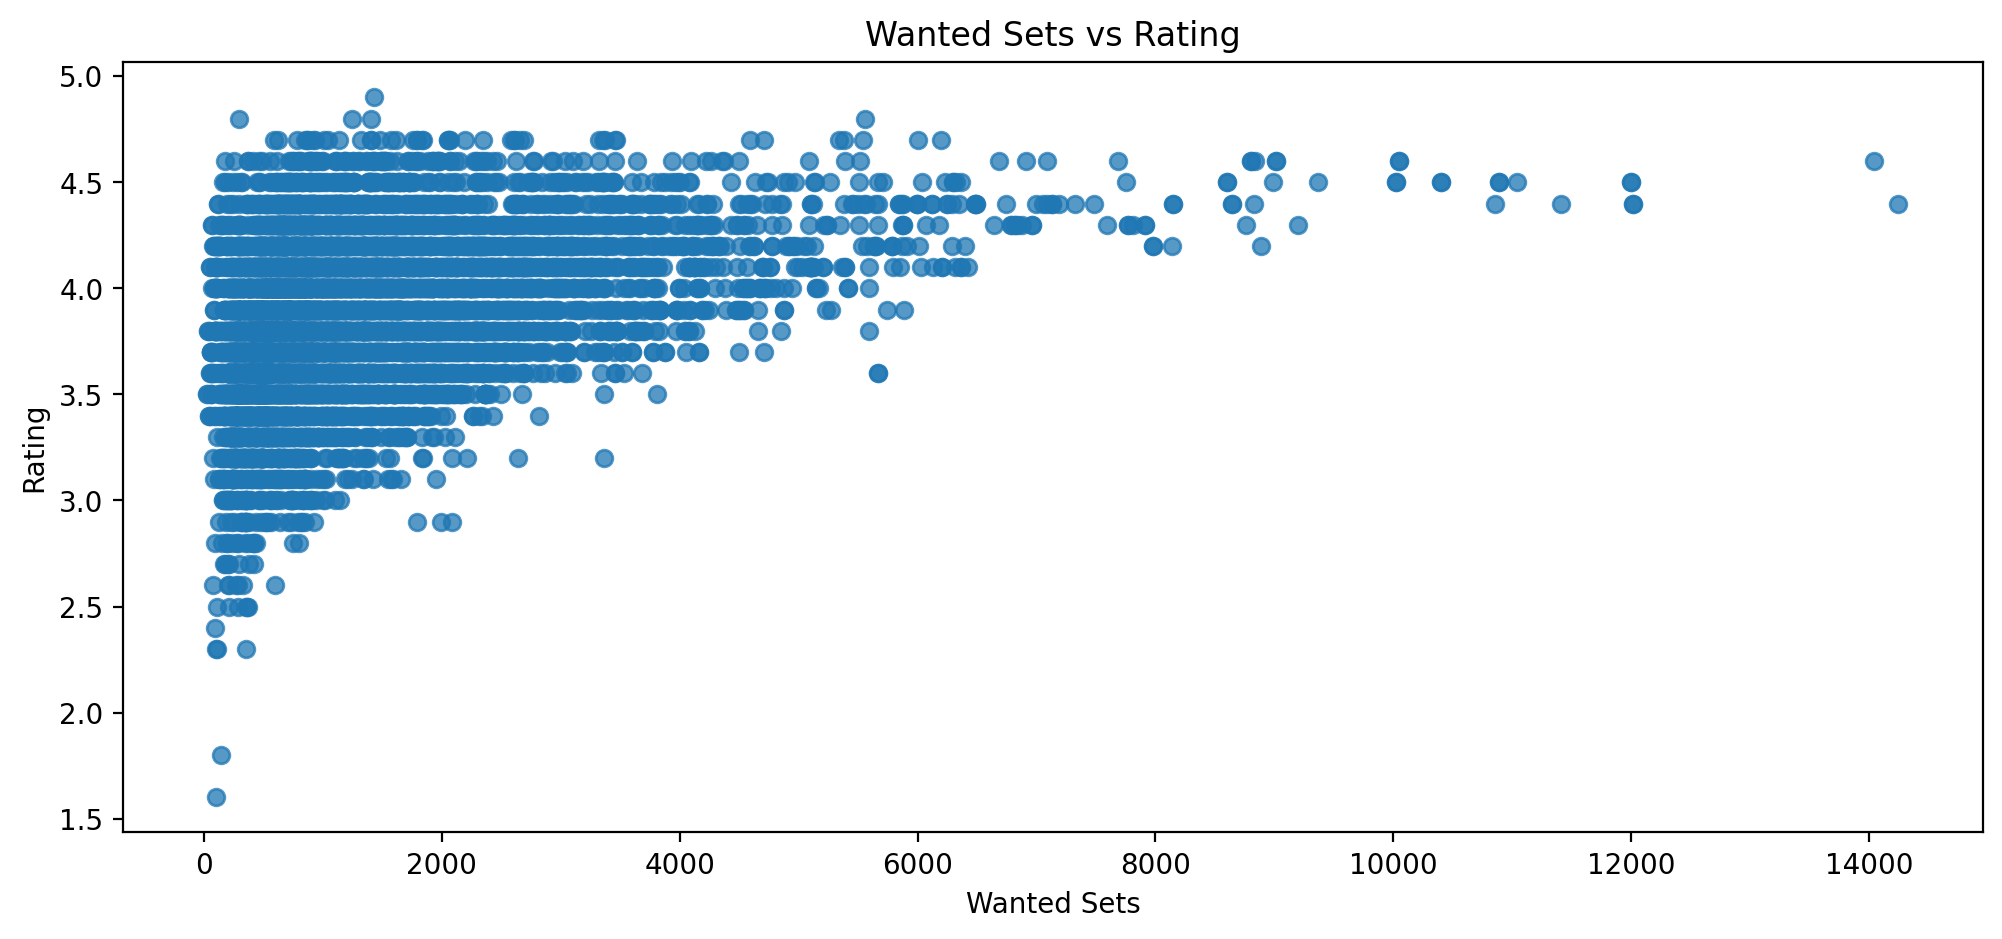

In [ ]:
# Visualizing Wanted Sets vs Rating
plt.scatter(brickset['No_want'], brickset['Rating'], alpha = 0.75)
plt.title('Wanted Sets vs Rating')
plt.xlabel('Wanted Sets')
plt.ylabel('Rating');

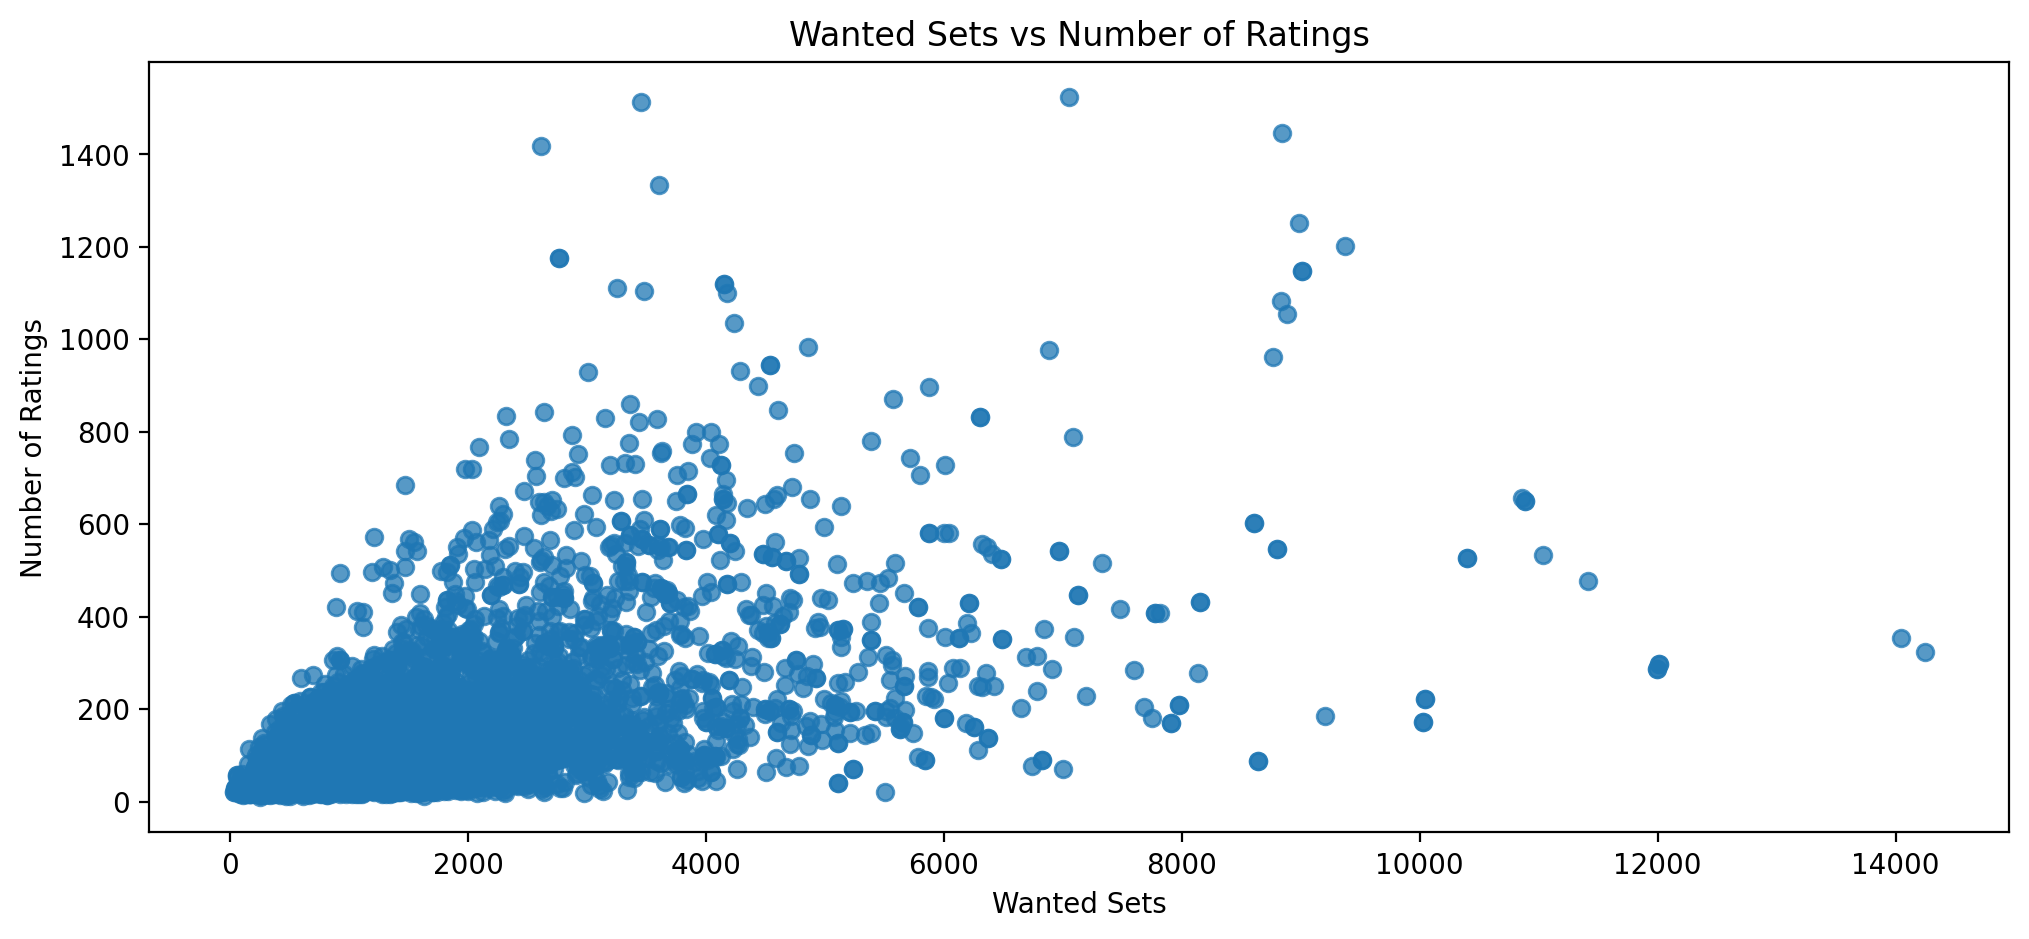

In [ ]:
# Visualizing the Wanted Sets vs Number of Ratings
plt.scatter(brickset['No_want'], brickset['Num_ratings'], alpha = 0.75)
plt.title('Wanted Sets vs Number of Ratings')
plt.xlabel('Wanted Sets')
plt.ylabel('Number of Ratings');

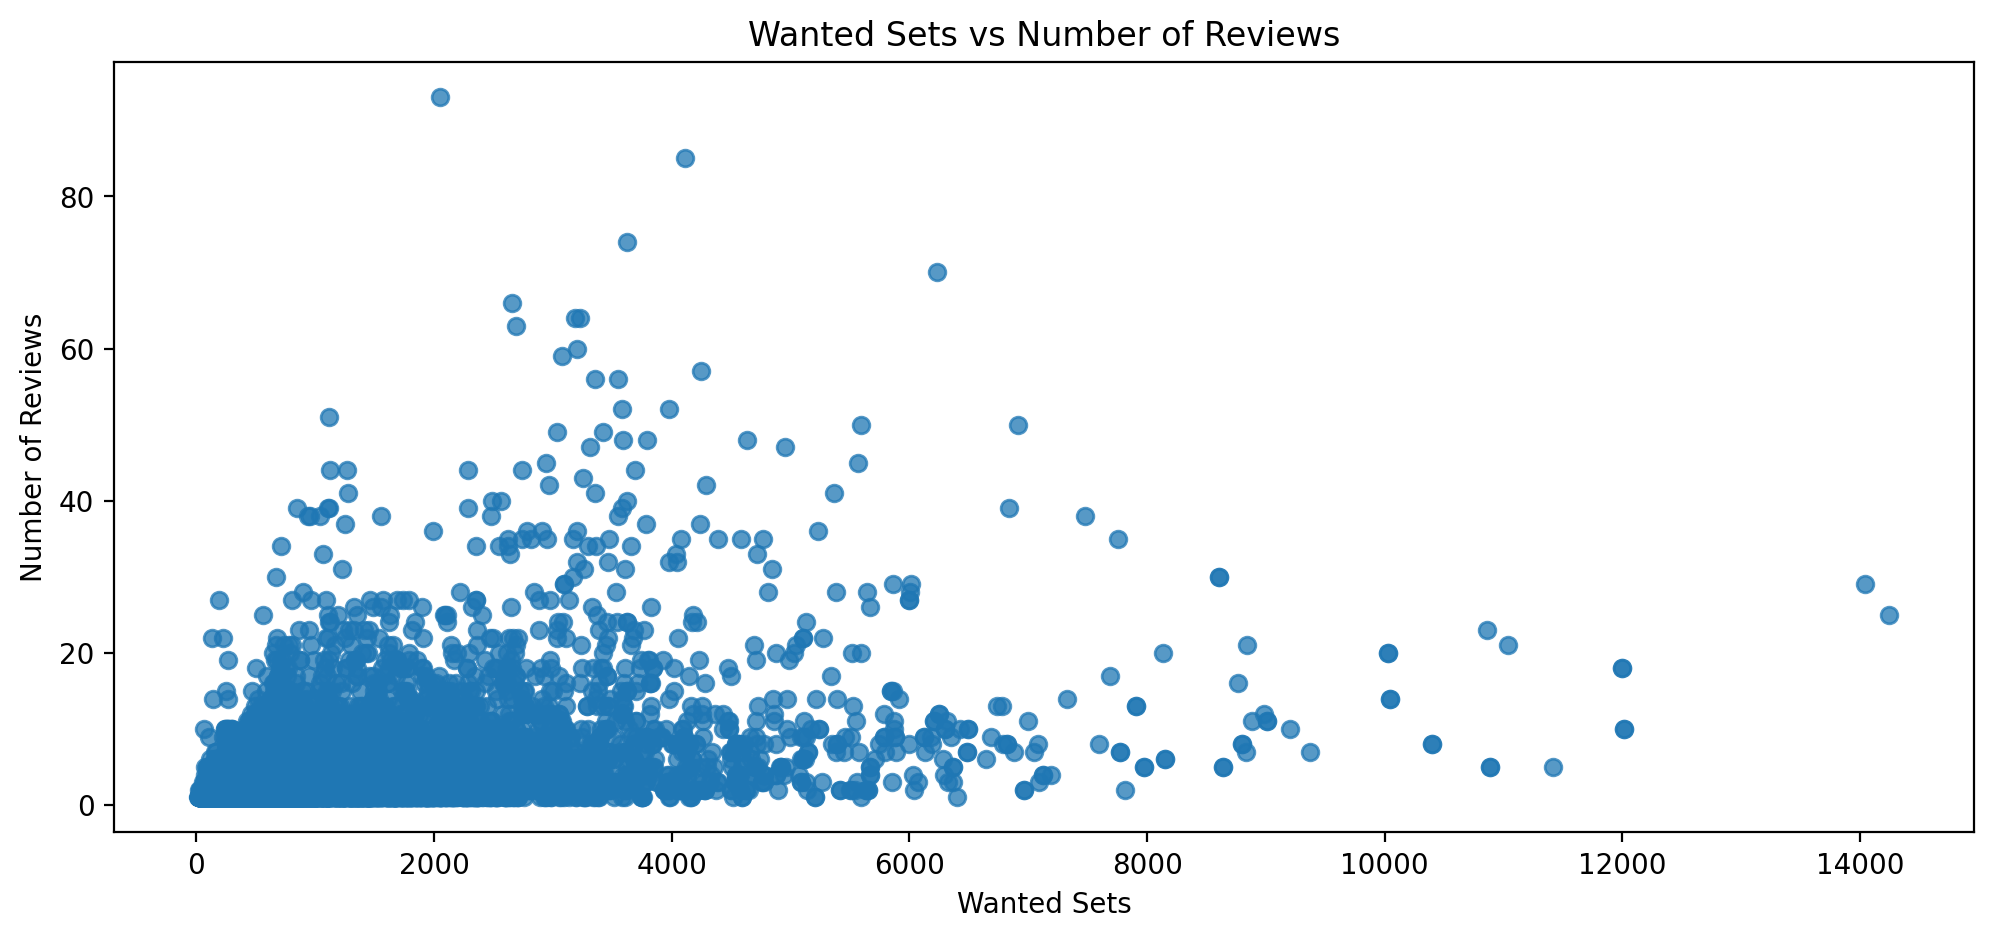

In [ ]:
# Visualizing the Wanted Sets vs Number of Reviews
plt.scatter(brickset['No_want'], brickset['Num_reviews'], alpha = 0.75)
plt.title('Wanted Sets vs Number of Reviews')
plt.xlabel('Wanted Sets')
plt.ylabel('Number of Reviews');

#### SQ5 Analysis
For this sub-question, we decided to narrow our focus to the number of wanted sets versus rating, number of ratings, and number of reviews. Similar to what we have seen before, the most popular sets are not necessarily rated as the highest, rather they tend to converge on 4.5 with two sets being the most desired. At a demand of 6,000 people is approximately where the ratings tend to remain above 4.

Majority of sets have a number of ratings between 0 to 600. The most wanted sets tend to have anywhere between 200 to 400 ratings. In contrast, the most rated sets have above 1,000 ratings, but a highly variable demand of 2,000 to 10,000 people.

Reviews tend to require more work and we see the count fall in comparison to the number of ratings. Majority of sets have anywhere between 0 to 40 reviews with the most popular ones having less than 20 reviews. It is fascinating to see that the most reviewed LEGO set is not the most wanted and the most wanted is not the most reviewed either.

#### SQ6: How does the presence of LEGO Minifigures affect the set popularity?

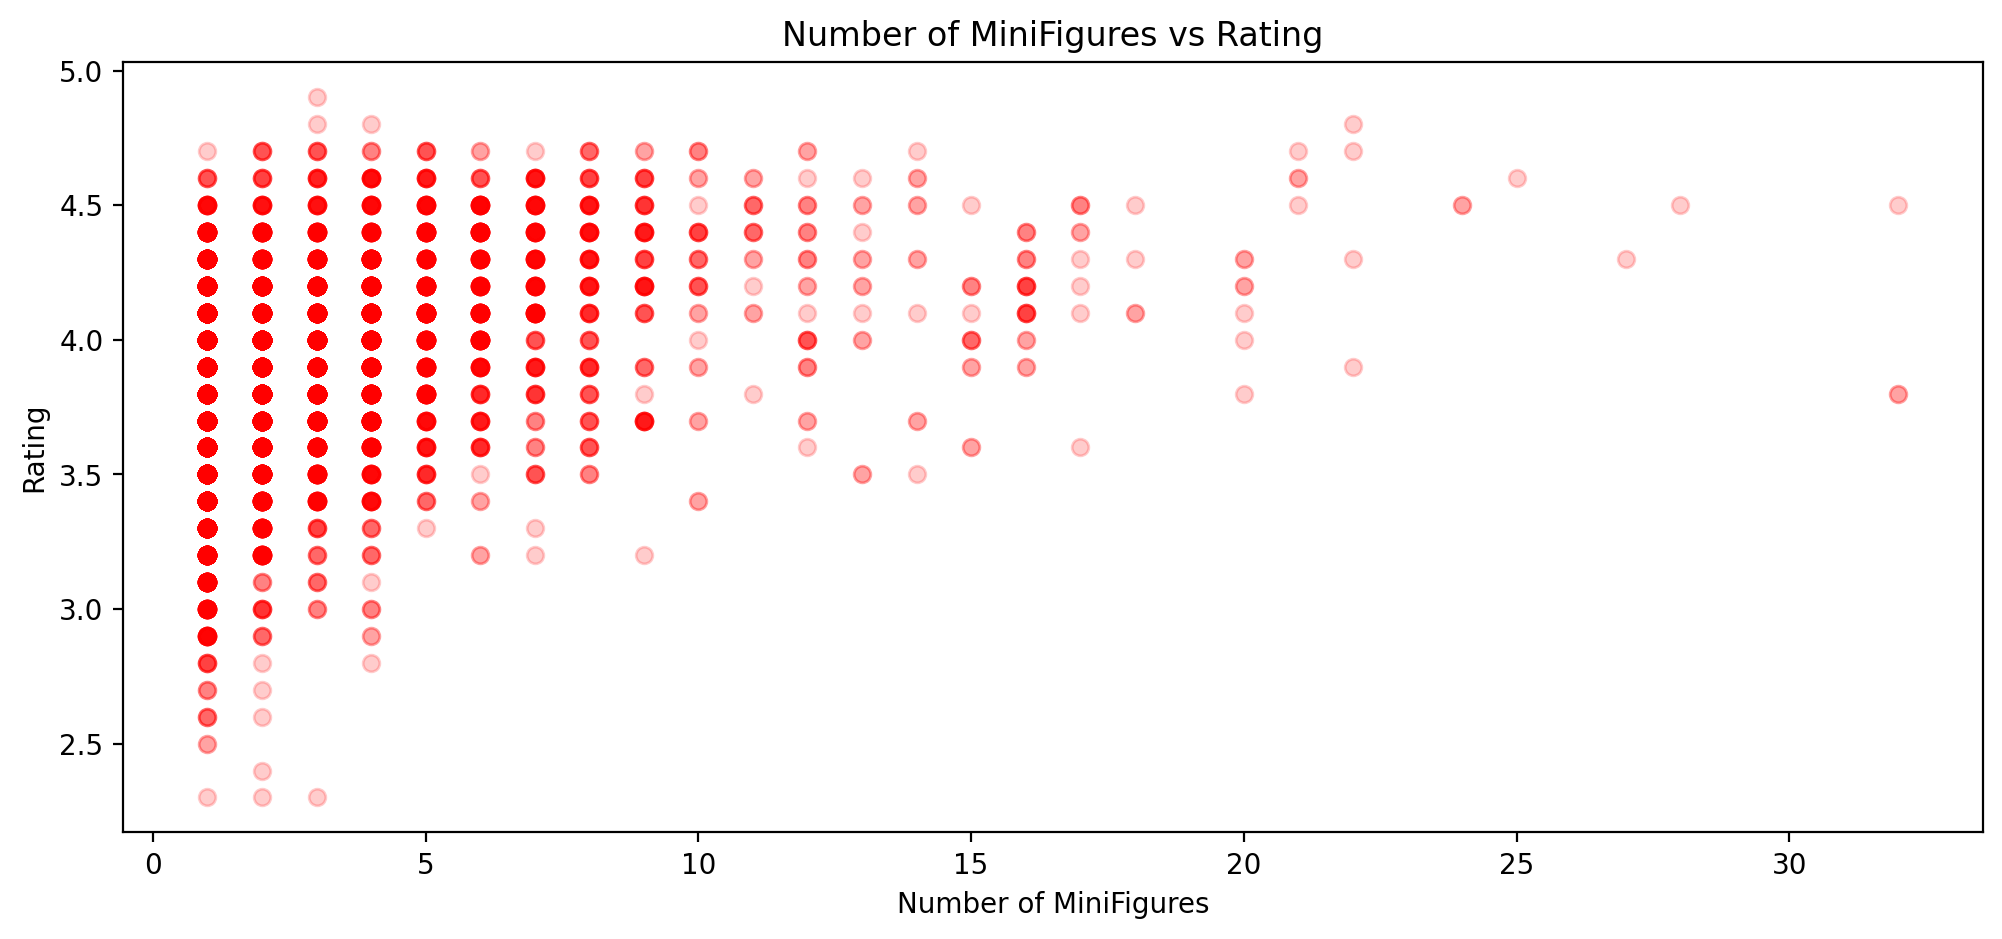

In [ ]:
# Visualizing the Number of MiniFigures vs the Rating for LEGO sets
plt.scatter(brickset['No_of_minifigs'], brickset['Rating'], color = 'red', alpha = 0.2)
plt.title('Number of MiniFigures vs Rating')
plt.xlabel('Number of MiniFigures')
plt.ylabel('Rating');

In [ ]:
# Checking if there are any LEGO sets with 0 MiniFigures
any_0_minifigs = (brickset['No_of_minifigs'] == 0).any()
print(any_0_minifigs)

False


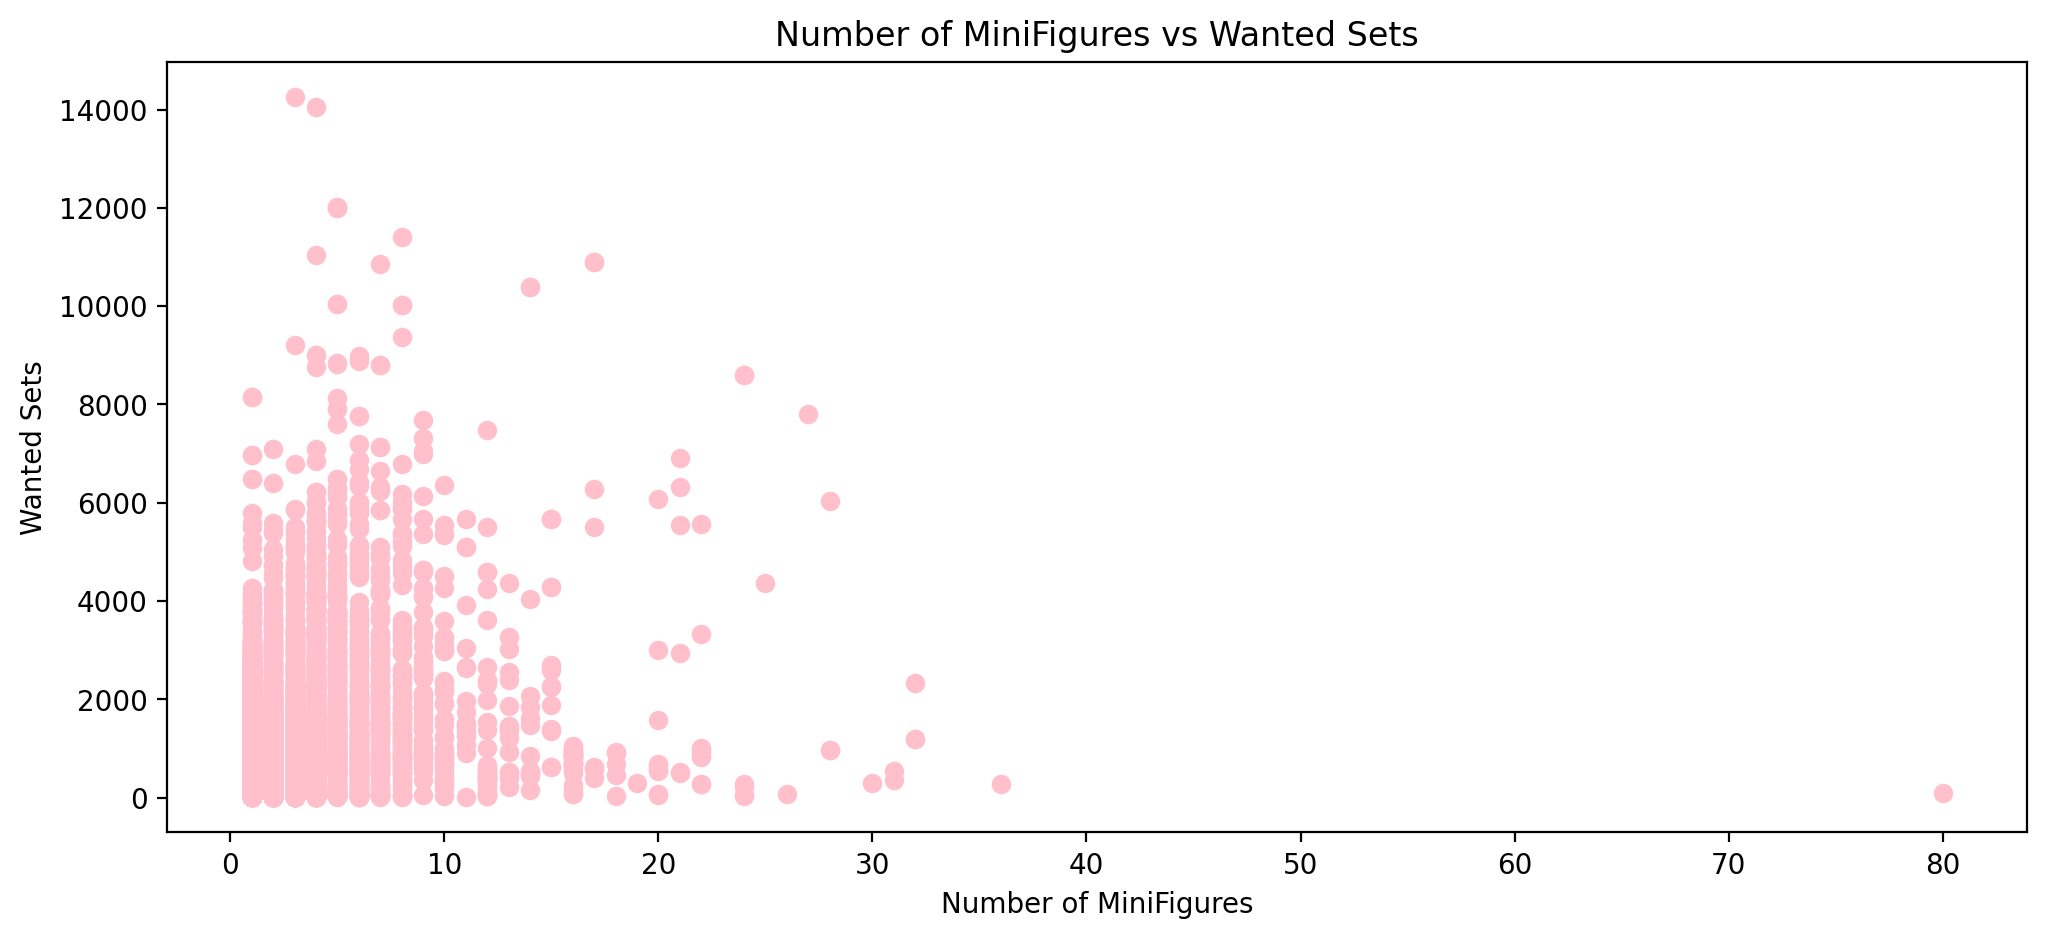

In [ ]:
# Visualizing the Number of Minifigures vs Wanted Sets
plt.scatter(brickset['No_of_minifigs'], brickset['No_want'], color = 'pink')
plt.title('Number of MiniFigures vs Wanted Sets')
plt.xlabel('Number of MiniFigures')
plt.ylabel('Wanted Sets');

#### SQ6 Analysis
Most LEGO sets have anywhere between 1 to 10 MiniFigures. We can see that there are relatively high ratings regardless if the set has 2 or 8 MiniFigures. LEGO sets with 10 or more MiniFigures will have a rating of at least 3.5 or more. It is important to note that having at least 1 MiniFigure is connected to high ratings, but more MiniFigures does not lead to the highest ratings.

Many people want LEGO sets with at least 1 to 10 MiniFigures. We noticed that the most demanded LEGO sets have approximately 3 or 4 MiniFigures. Similar to the ratings, there is not a high demand for sets that have more than 30 MiniFigures.

#### SQ7: Does the designer of the LEGO set have any influence on its popularity?

In [ ]:
# Changing the values into string
brickset['Designer'] = brickset['Designer'].astype(str).str.replace(r"[\'\[\]]", '') # replace(r'[()]', '')

# Counting the number of LEGO sets per designer
designer_counts = brickset['Designer'].value_counts()
designer_counts.head(11)


<ipython-input-277-ee06440e0b83>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  brickset['Designer'] = brickset['Designer'].astype(str).str.replace(r"[\'\[\]]", '') # replace(r'[()]', '')


nan                     12112
Henrik Andersen           171
Bjarke Lykke Madsen       132
Henrik Rubin Saaby        114
Jan Neergaard Olesen      108
Mel Caddick               101
Justin Ramsden             99
Adam Grabowski             98
Steen Sig Andersen         93
Jørn Thomsen               82
Hans Henrik Sidenius       76
Name: Designer, dtype: int64

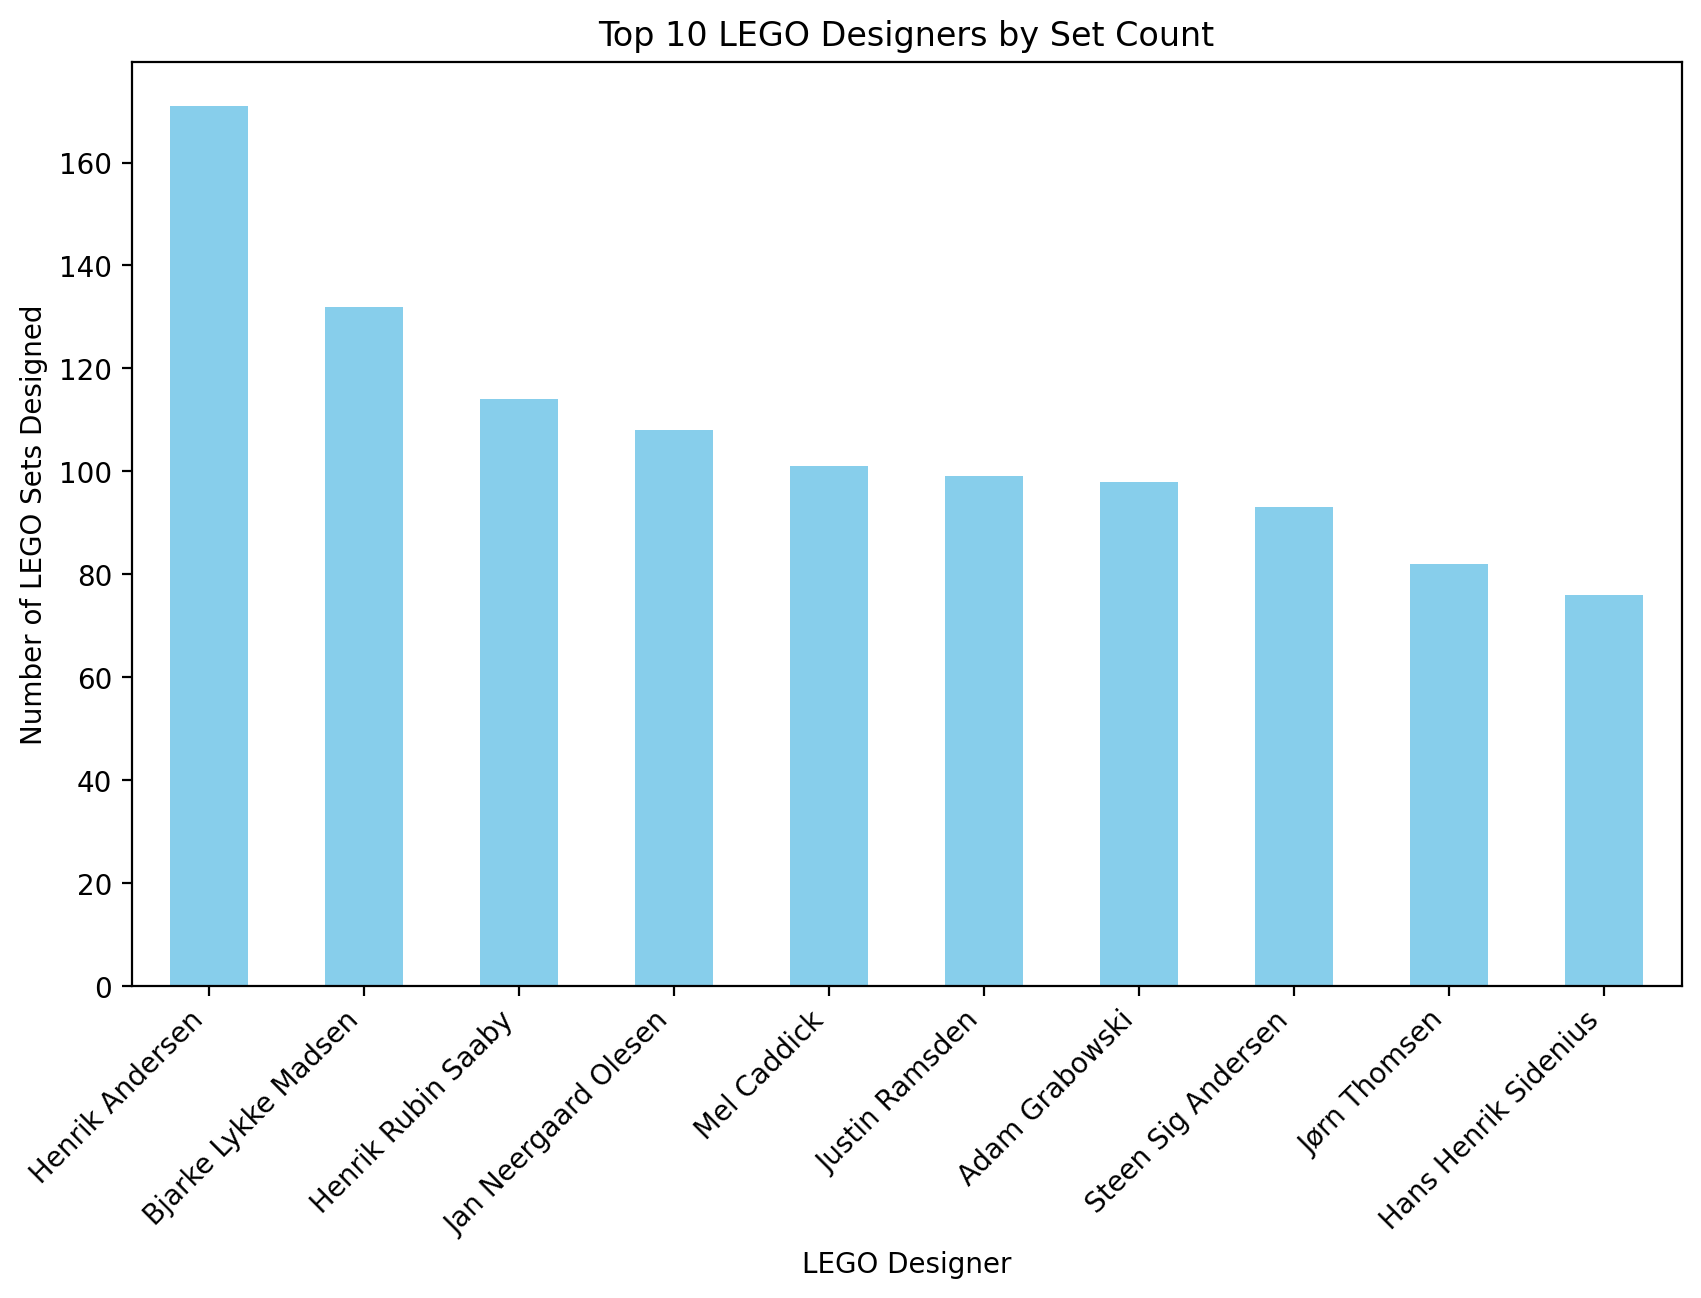

In [ ]:
designer_counts[1:11].plot(kind='bar', figsize=(10, 6), color='skyblue')

# Visualizing the LEGO Designers with Most Sets
plt.title('Top 10 LEGO Designers by Set Count')
plt.xlabel('LEGO Designer')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of LEGO Sets Designed');


In [ ]:
# Determining the Number of Wanted Sets for Each Designer
top10_designers = ["Henrik Andersen", 'Bjarke Lykke Madsen', 'Henrik Rubin Saaby', 'Jan Neergaard Olesen', 'Mel Caddick', 'Justin Ramsden', 'Adam Grabowski', 'Steen Sig Andersen', 'Jørn Thomsen', 'Hans Henrik Sidenius']

# Filtering Brickset df based on the list of top designers
top10_designers_df = brickset[brickset['Designer'].isin(top10_designers)]

# Summing the total of Wanted Sets for each designer
total_per_designer = top10_designers_df.groupby('Designer')['No_want'].sum()

print(total_per_designer)


Designer
Adam Grabowski          239799
Bjarke Lykke Madsen     238537
Hans Henrik Sidenius    131267
Henrik Andersen         341064
Henrik Rubin Saaby      167775
Jan Neergaard Olesen    358040
Justin Ramsden           82727
Jørn Thomsen             93845
Mel Caddick             106797
Steen Sig Andersen      159875
Name: No_want, dtype: int64


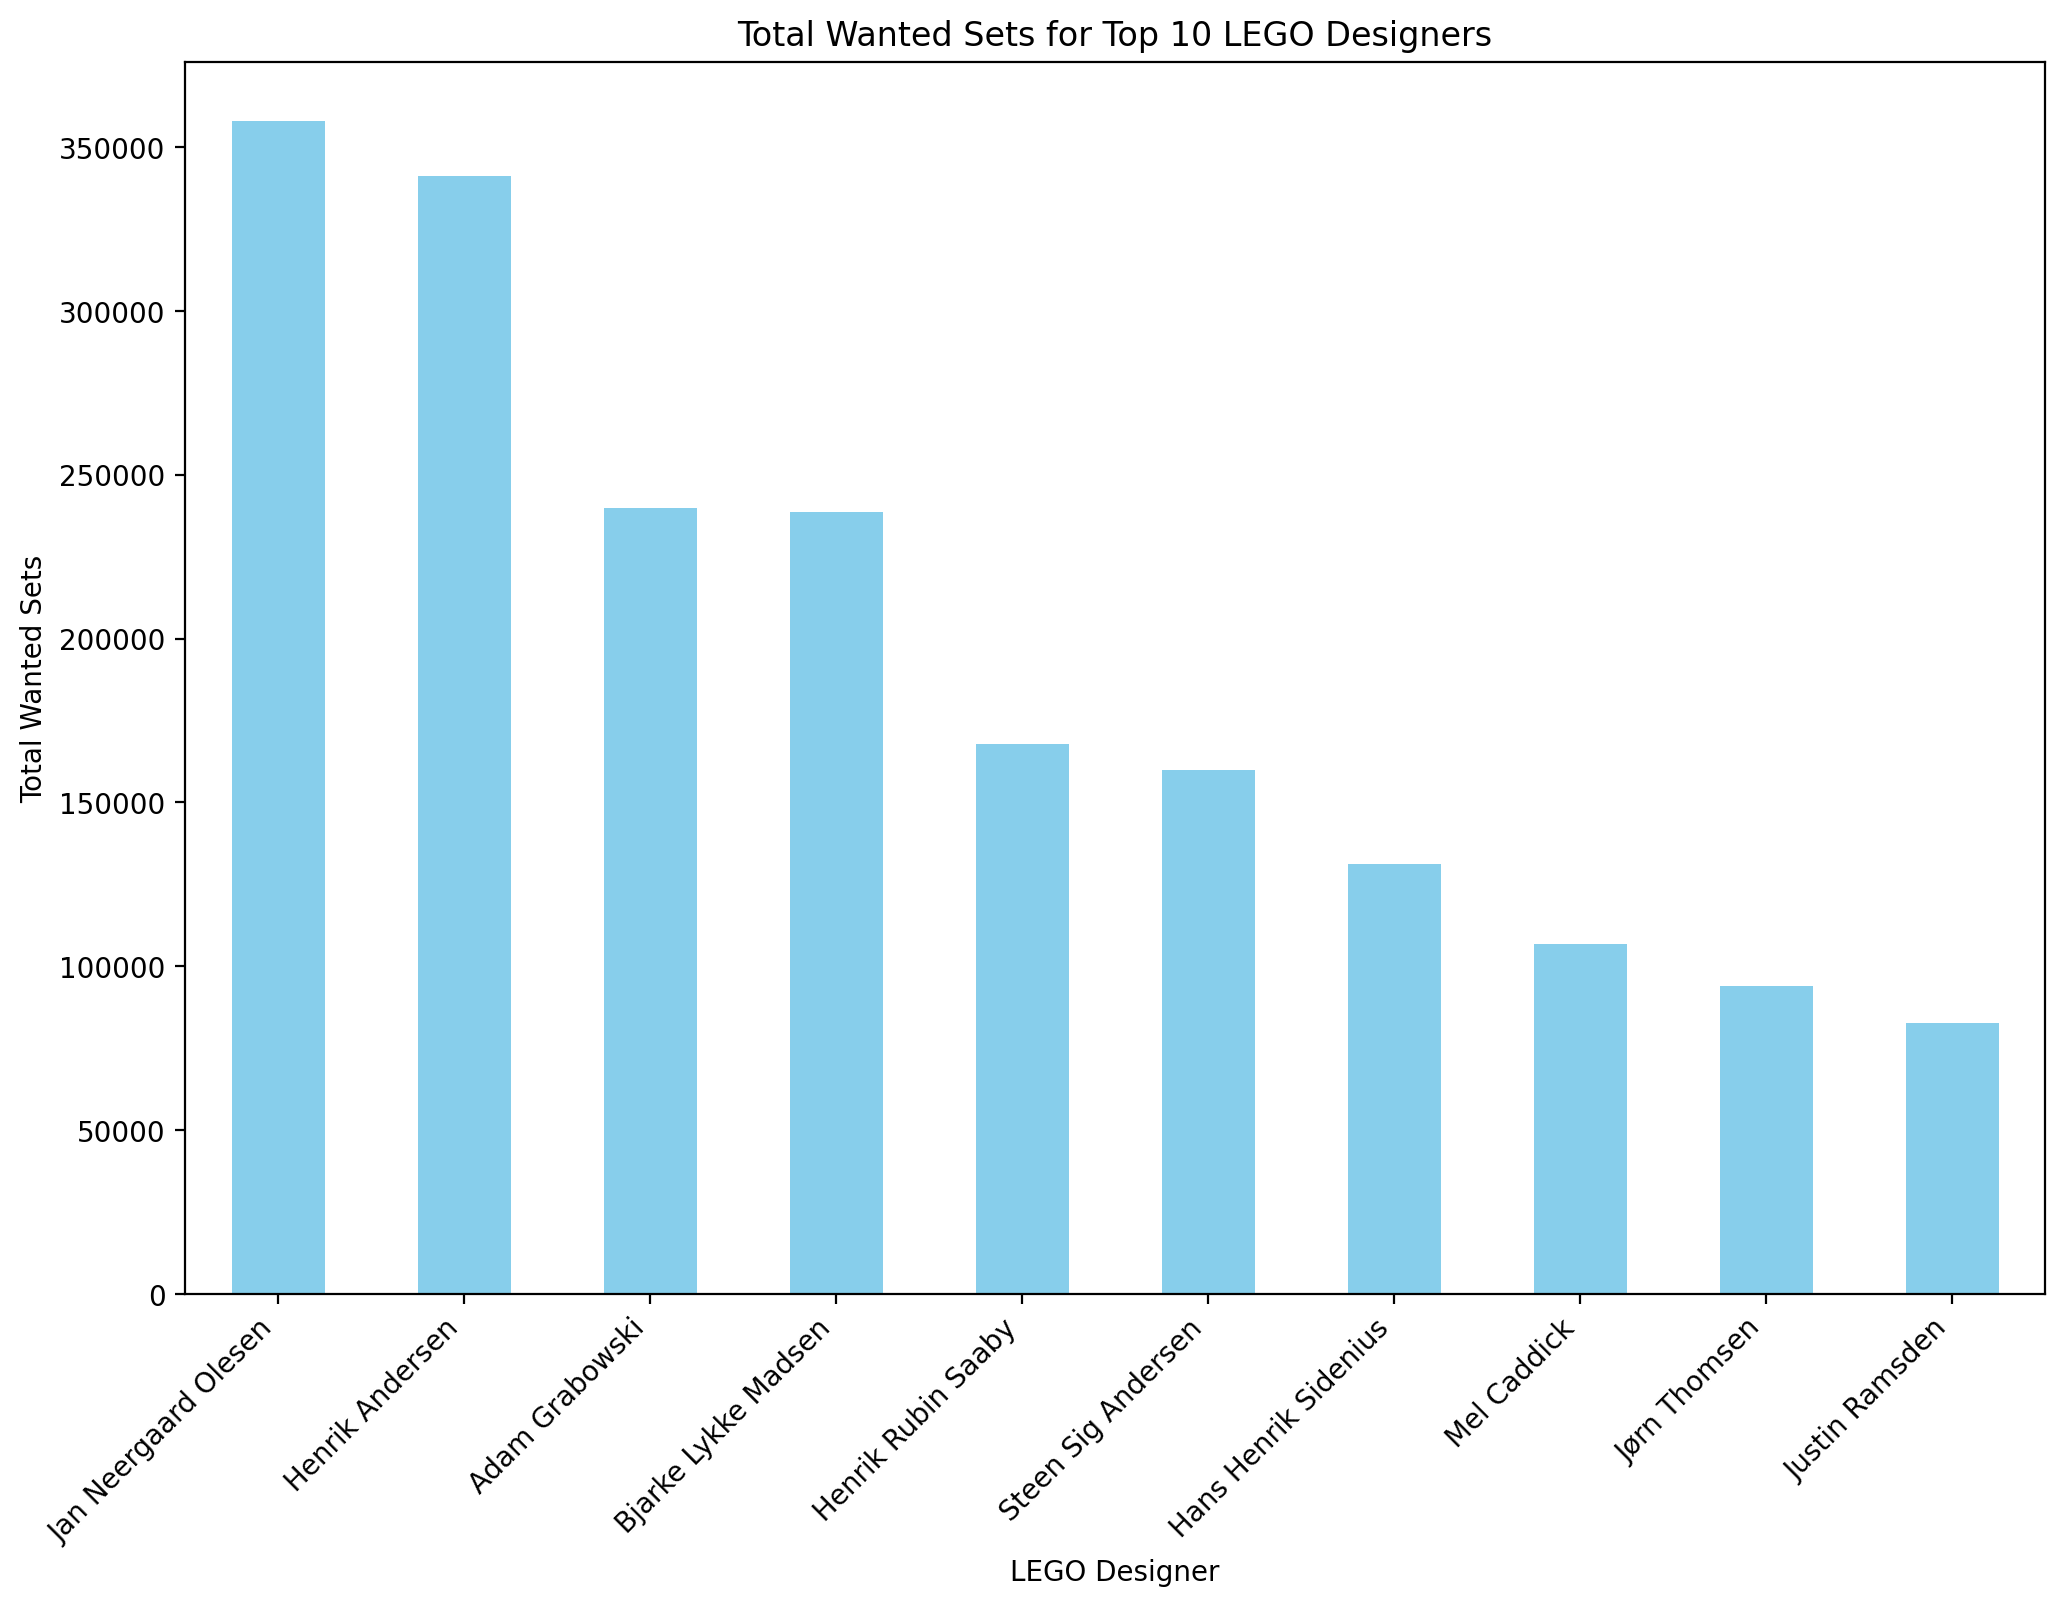

In [ ]:
# Plotting for comparison
total_per_designer.sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(12, 8))
plt.title('Total Wanted Sets for Top 10 LEGO Designers')
plt.xlabel('LEGO Designer')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Total Wanted Sets');

#### SQ7 Analysis

Some designers have a lot more sets than others, but that does not directly correlate with the most wanted sets. For instance, Jan Neergaard Olesen has only designed a mere 108 LEGO sets, but about 358 thousand people want his sets. Henrik Andersen who has designed 171 sets, but has about 20,000 less demand with 341 thousand people. Another example is Adam Grabowski who has designed only 98 sets and has the third most wanted sets at 239 thousand people. This might indicate that the designer plays a critical role in determining the popularity of the set similar to the way an artist sells a painting.